In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

In [4]:
trainpath = 'seg_train/'
testpath = 'seg_test/'
predpath = 'seg_pred/'


In [5]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 125 in folder bala
For training data , found 165 in folder Black-winged hatchetfish
For training data , found 165 in folder blood-red jewel cichild
For training data , found 165 in folder blue zebra angelfish
For training data , found 132 in folder bolivian ram
For training data , found 152 in folder botia striata fish
For training data , found 176 in folder Bristlenose_catfish
For training data , found 176 in folder celestial eye goldfish
For training data , found 176 in folder clown
For training data , found 178 in folder clown loach
For training data , found 162 in folder damsel fish
For training data , found 160 in folder Electric blue cichild
For training data , found 165 in folder Electric_fish
For training data , found 151 in folder figure eight puffer
For training data , found 176 in folder Flowerhorn cichlid
For training data , found 85 in folder Gold
For training data , found 143 in folder Guppy
For training data , found 176 in folder lion
For traini

In [6]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 146 in folder bala
For testing data , found 165 in folder Black-winged hatchetfish
For testing data , found 165 in folder blood-red jewel cichild
For testing data , found 176 in folder blue zebra angelfish
For testing data , found 154 in folder bolivian ram
For testing data , found 141 in folder botia striata fish
For testing data , found 165 in folder Bristlenose_catfish
For testing data , found 176 in folder celestial eye goldfish
For testing data , found 187 in folder clown
For testing data , found 167 in folder clown loach
For testing data , found 166 in folder damsel fish
For testing data , found 122 in folder Electric blue cichild
For testing data , found 165 in folder Electric_fish
For testing data , found 129 in folder figure eight puffer
For testing data , found 176 in folder Flowerhorn cichlid
For testing data , found 90 in folder Gold
For testing data , found 187 in folder Guppy
For testing data , found 187 in folder lion
For testing data , found 164

In [7]:
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 1569


In [8]:
code = {'lion':0 ,'Gold':1 ,'bala':2 ,'blue zebra angelfish':3 ,'celestial eye goldfish':4 ,'clown':5 ,'clown loach':6 ,'Guppy':7 ,'neon tetra':8 ,'Powder_blue_fish':9 ,'Sea Horse Fish':10 ,'symphysodon discus':11 ,'Yellow Tang':12 ,'Black-winged hatchetfish':13 ,'blood-red jewel cichild':14 ,'bolivian ram':15 ,'botia striata fish':16 ,'Bristlenose_catfish':17 ,'damsel fish':18 ,'Electric blue cichild':19 ,'Electric_fish':20 ,'figure eight puffer':21 ,'Flowerhorn cichlid':22 ,'neon goby':23 ,'Oscar Fish':24 ,'Paradise Fish':25 ,'Red_tail_black_shark':26 ,'Thalassoma_bifasciatum':27 ,'zebra danio fish':28}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [9]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

C:\Users\User\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(183, 275, 3)     410
(194, 259, 3)     273
(225, 225, 3)     254
(280, 390, 3)     157
(168, 300, 3)      84
                 ... 
(240, 361, 3)       1
(68, 76, 3)         1
(520, 900, 3)       1
(497, 1297, 3)      1
(161, 314, 3)       1
Length: 1499, dtype: int64

In [10]:
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(183, 275, 3)     445
(194, 259, 3)     281
(225, 225, 3)     249
(280, 390, 3)     148
(168, 300, 3)      91
                 ... 
(240, 280, 3)       1
(508, 800, 3)       1
(936, 1300, 3)      1
(299, 450, 3)       1
(161, 314, 3)       1
Length: 1454, dtype: int64

In [11]:
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(183, 275, 3)    164
(194, 259, 3)    116
(225, 225, 3)     90
(280, 390, 3)     60
(168, 300, 3)     29
                ... 
(160, 240, 3)      1
(322, 769, 3)      1
(229, 460, 3)      1
(773, 799, 3)      1
(224, 226, 3)      1
Length: 617, dtype: int64

In [12]:
s = 100

In [13]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [14]:
print(f'we have {len(X_train)} items in X_train')

we have 4737 items in X_train


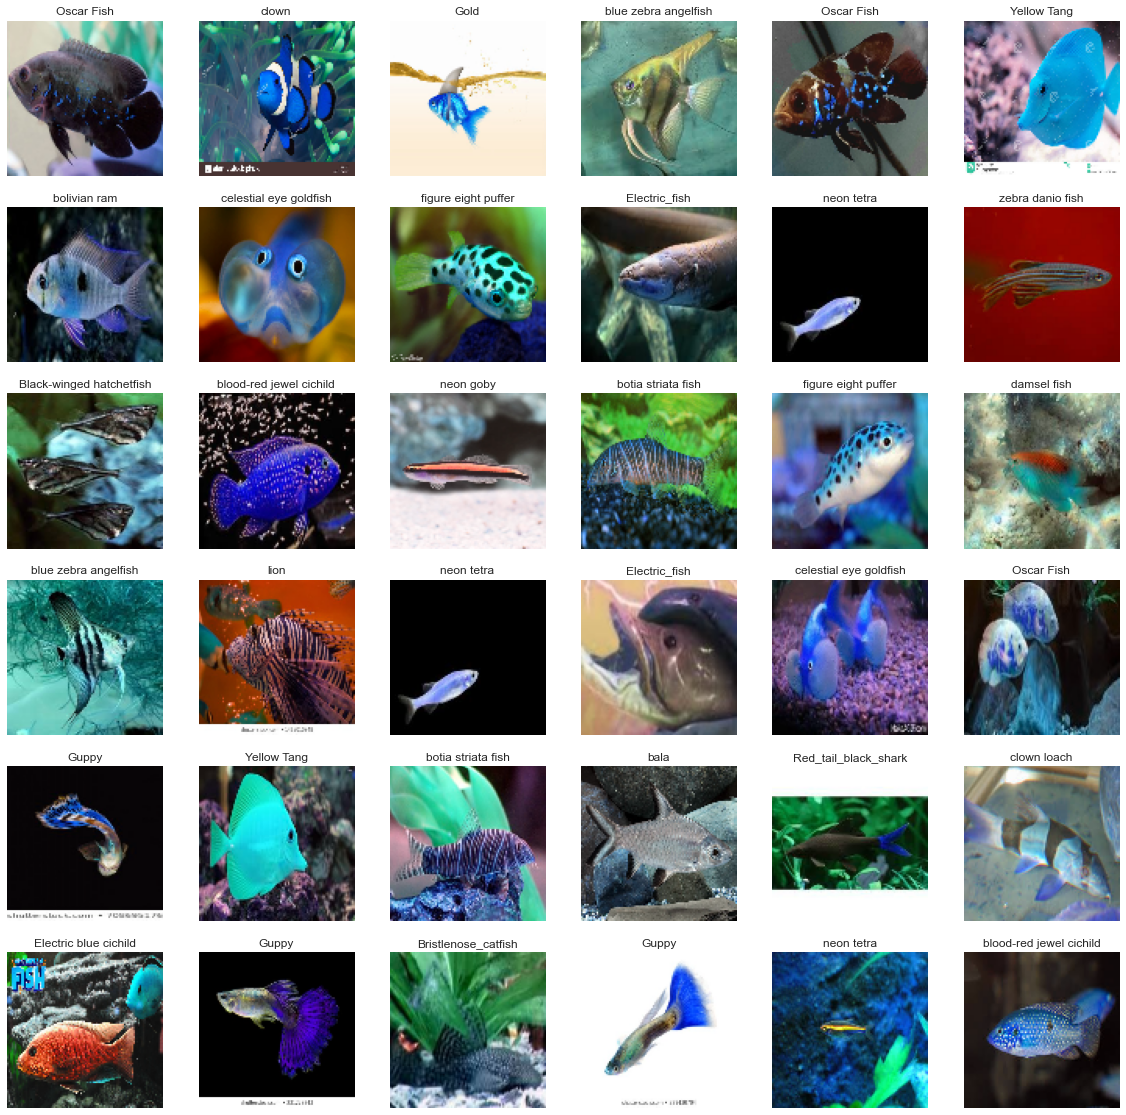

In [15]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [16]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [17]:
print(f'we have {len(X_test)} items in X_test')

we have 4700 items in X_test


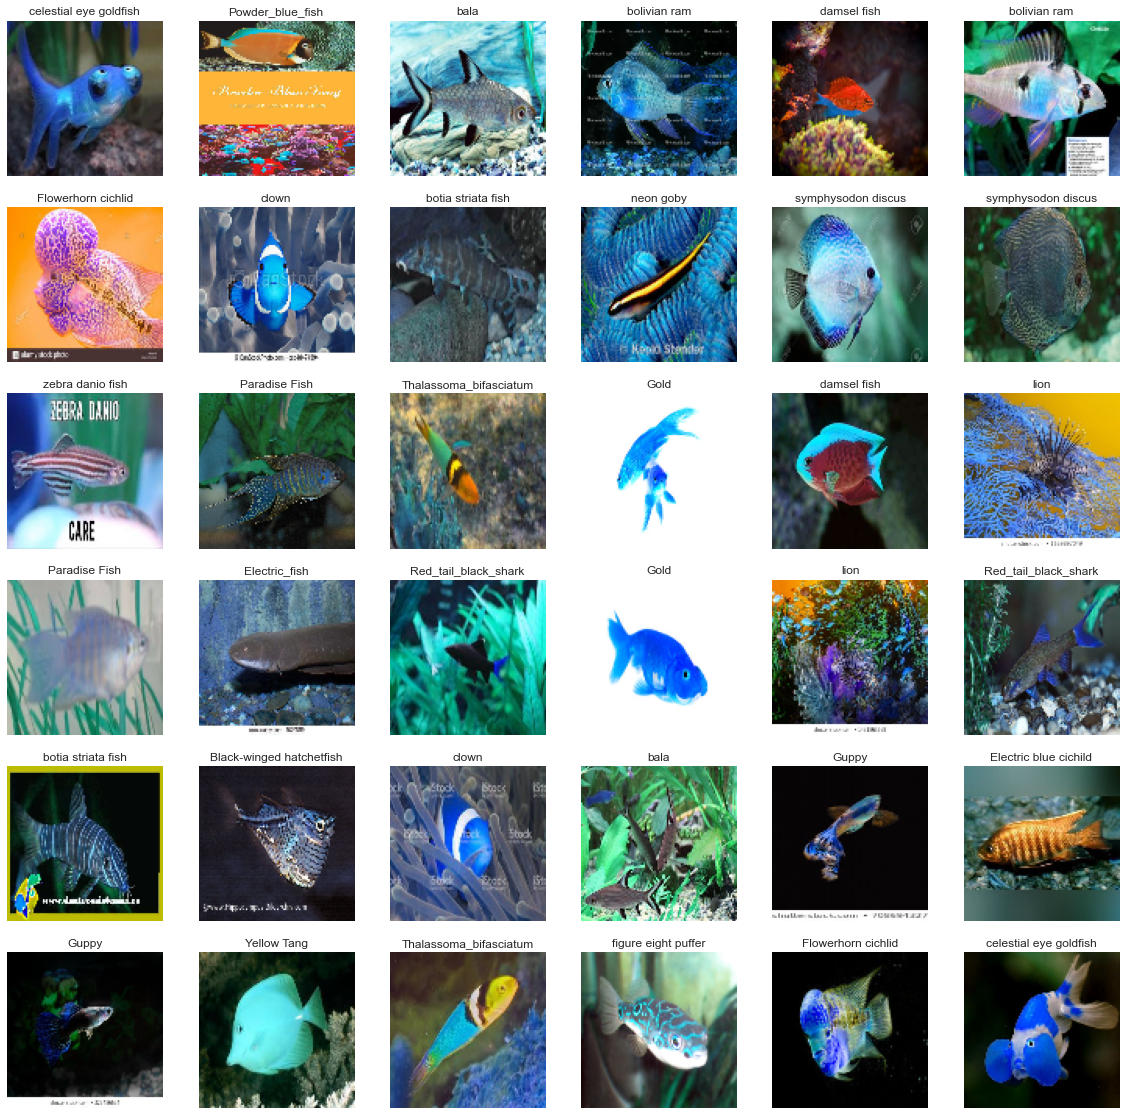

In [18]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [19]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))

In [20]:
print(f'we have {len(X_pred)} items in X_pred')

we have 1569 items in X_pred


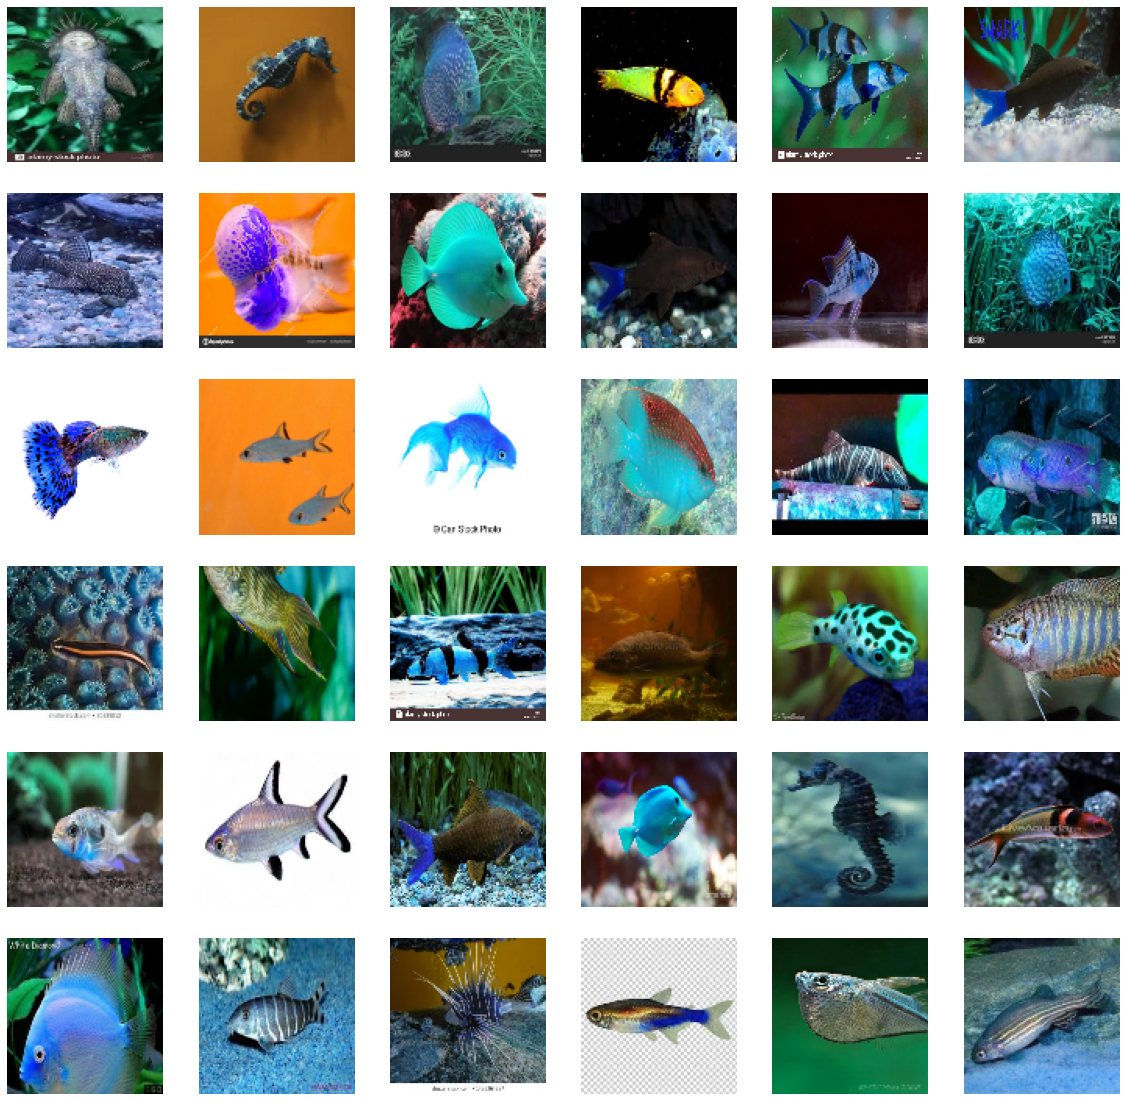

In [21]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [22]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (4737, 100, 100, 3)
X_test shape  is (4700, 100, 100, 3)
X_pred shape  is (1569, 100, 100, 3)
y_train shape  is (4737,)
y_test shape  is (4700,)


In [25]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,                   
        keras.layers.Dense(29,activation='softmax') ,    
        ])

In [23]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [26]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None,

In [28]:
epochs = 25
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/25
75/75 [==============================] - 385s 5s/step - loss: 4.8379 - accuracy: 0.0352
Epoch 2/25
75/75 [==============================] - 379s 5s/step - loss: 3.2769 - accuracy: 0.0744
Epoch 3/25
75/75 [==============================] - 370s 5s/step - loss: 2.9361 - accuracy: 0.1624
Epoch 4/25
75/75 [==============================] - 359s 5s/step - loss: 2.5833 - accuracy: 0.2409
Epoch 5/25
75/75 [==============================] - 352s 5s/step - loss: 2.4630 - accuracy: 0.2778
Epoch 6/25
75/75 [==============================] - 350s 5s/step - loss: 2.3693 - accuracy: 0.3281
Epoch 7/25
75/75 [==============================] - 378s 5s/step - loss: 2.1079 - accuracy: 0.3873
Epoch 8/25
75/75 [==============================] - 391s 5s/step - loss: 1.5847 - accuracy: 0.5299
Epoch 9/25
75/75 [==============================] - 397s 5s/step - loss: 1.5804 - accuracy: 0.5267
Epoch 10/25
75/75 [==============================] - 413s 6s/step - loss: 1.2518 - accuracy: 0.6258
Epoch 11/

In [29]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

147/147 [==============================] - 77s 519ms/step - loss: 1.3593 - accuracy: 0.8123


In [30]:
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

Test Loss is 1.3592817783355713
Test Accuracy is 0.8123404383659363
